In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

Exploratory Data Analysis

In [11]:
train_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount    

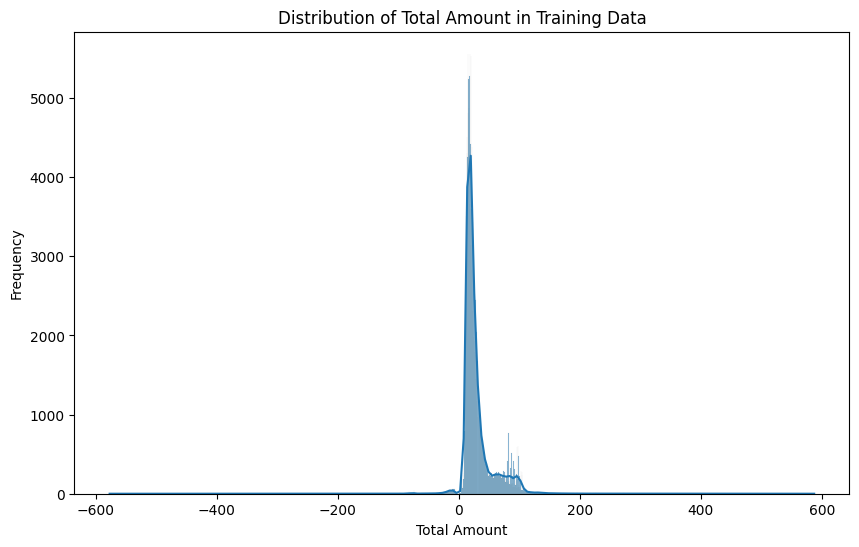

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Display basic information about the datasets
print("Training Data Info:")
print(train_df.info())
print("\nTesting Data Info:")
print(test_df.info())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Training Data:")
print(train_df.describe())

# Visualize the distribution of the target variable (total_amount) in the training data
plt.figure(figsize=(10, 6))
sns.histplot(train_df['total_amount'], kde=True)
plt.title('Distribution of Total Amount in Training Data')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


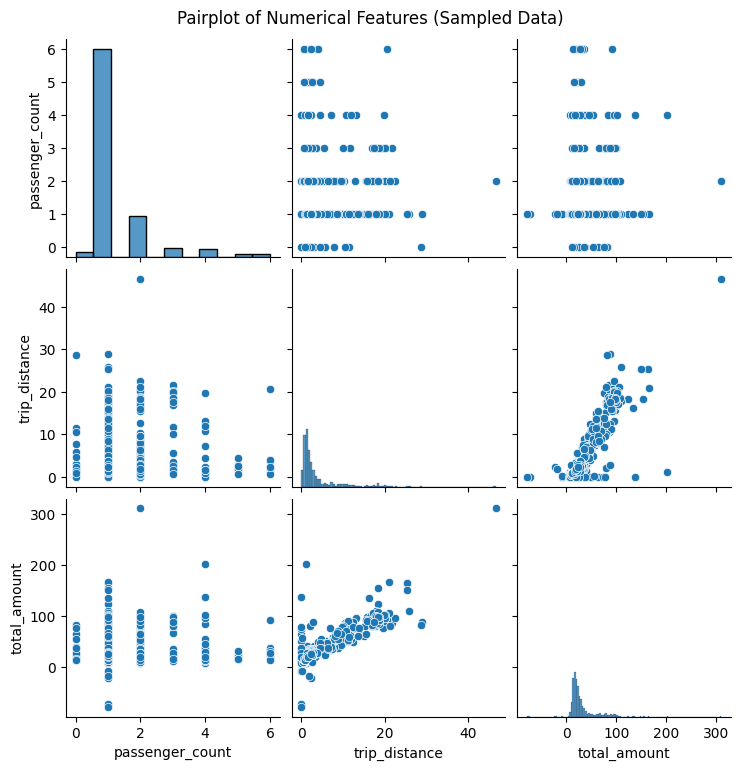

In [9]:
# Sample a subset of the training data for pairplot
sample_train_df = train_df.sample(n=1000, random_state=42)

# Visualize relationships between numerical features using a pairplot
sns.pairplot(sample_train_df[['passenger_count', 'trip_distance', 'total_amount']])
plt.suptitle('Pairplot of Numerical Features (Sampled Data)', y=1.02)
plt.show()


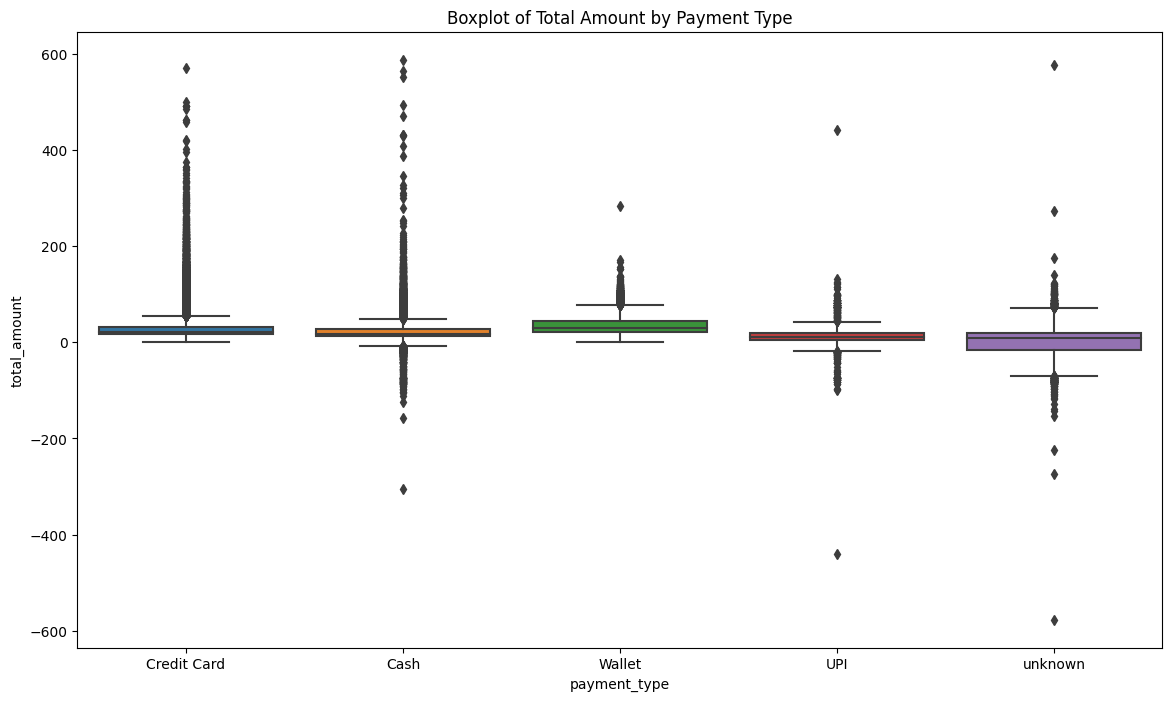

In [7]:
# Visualize relationships between categorical features and the target variable
plt.figure(figsize=(14, 8))
sns.boxplot(x='payment_type', y='total_amount', data=train_df)
plt.title('Boxplot of Total Amount by Payment Type')
plt.show()

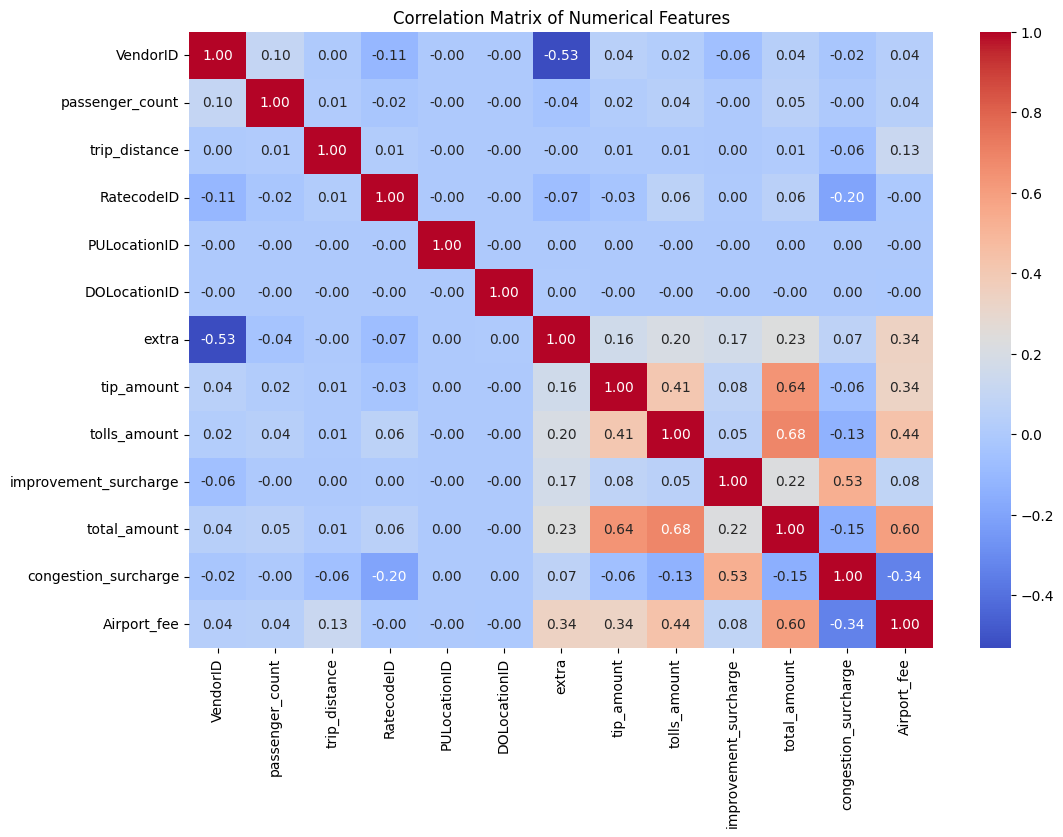

In [10]:
# Exclude non-numeric columns from the correlation matrix
numeric_columns = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numeric_columns].corr()

# Visualize correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Random Forest Regressor

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (Random Forest Regressor in this case)
model = RandomForestRegressor(max_depth=20,n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"R-squared (R2) Score on Training Set: {r2_train}")


R-squared (R2) Score on Training Set: 0.9873963888776781


In [10]:
# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


Cutoff Score is 0.94435

In [ ]:
'''import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from skliearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y = train_df['total_amount']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and their respective hyperparameter grids for tuning
models = {
    'RandomForest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GradientBoosting': (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LinearRegression': (LinearRegression(), {'normalize': [True, False]})
}

# Iterate over models, perform hyperparameter tuning, and evaluate
for model_name, (model, param_grid) in models.items():
    print(f"\nHyperparameter tuning for {model_name}...")
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: {best_params}")
    
    # Evaluate on the validation set
    val_predictions = grid_search.best_estimator_.predict(X_val)
    mse = mean_squared_error(y_val, val_predictions)
    rmse = mse**0.5
    print(f"Root Mean Squared Error (RMSE) on Validation Set: {rmse}")

    # You can also perform cross-validation to get a more robust estimate of model performance
    cross_val_results = cross_val_score(grid_search.best_estimator_, X, y, scoring='neg_mean_squared_error', cv=5)
    cross_val_rmse = (-cross_val_results.mean())**0.5
    print(f"Cross-Validation RMSE: {cross_val_rmse}")
'''

Hyperparameter tuning for RandomForest...
Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Root Mean Squared Error (RMSE) on Validation Set: 5.1475506851833694
Cross-Validation RMSE: 6.057377859262414

Hyperparameter tuning for GradientBoosting...
Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 200}
Root Mean Squared Error (RMSE) on Validation Set: 5.5386291879091445
Cross-Validation RMSE: 6.221468372463396

Gradient Boosting Regressor

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (Gradient Boosting Regressor in this case)
model = GradientBoostingRegressor(learning_rate=0.2,n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"R-squared (R2) Score on Training Set: {r2_train}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


R-squared (R2) Score on Training Set: 0.9577643163570861


Cutoff score is 0.94461

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import MLPRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (Multi Layer Perceptron in this case)
model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', alpha=0.0001, max_iter=1000, tol=1e-4, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"R-squared (R2) Score on Training Set: {r2_train}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


R-squared (R2) Score on Training Set: -1.5204328908332694


R2 score is bad so not needed to check the submission score for this

KNN Regressor

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Create a KNN model
knn = KNeighborsRegressor()

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Adjust the values as needed

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, scoring=make_scorer(r2_score), cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_neighbors': 3}


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (K-Nearest Neighbors Regressor in this case)
model = KNeighborsRegressor(n_neighbors=3)  #3 from the Grid Search best parameters
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"R-squared (R2) Score on Training Set: {r2_train}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


R-squared (R2) Score on Training Set: 0.9047264234032898


Cutoff score is 0.77772

In [7]:
'''import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, scoring=make_scorer(r2_score), cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
'''

'import pandas as pd\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import make_scorer, r2_score\n\n# Load the training data\ntrain_df = pd.read_csv(\'/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv\')\n\n# Data Preprocessing\n# Fill missing values for numeric columns with mean\nnumeric_columns = train_df.select_dtypes(include=[\'number\']).columns\ntrain_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())\n\n# Feature Engineering\ntrain_df[\'tpep_pickup_datetime\'] = pd.to_datetime(train_df[\'tpep_pickup_datetime\'])\ntrain_df[\'hour_of_day\'] = train_df[\'tpep_pickup_datetime\'].dt.hour\ntrain_df[\'day_of_week\'] = train_df[\'tpep_pickup_datetime\'].dt.dayofweek\n\n# Encode categorical variables\ntrain_df = pd.get_dummies(train_df, columns=[\'store_and_fwd_flag\', \'payment_type\'], drop_first=True)\n\n# Split data into features 

Linear Regression

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (Linear Regression in this case)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"R-squared (R2) Score on Training Set: {r2_train}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


R-squared (R2) Score on Training Set: 0.724924576235809


R2 Score is too low for this model

Decision Tree Regressor

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (Decision Tree Regressor in this case)
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = decision_tree_model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train = r2_score(y_train, train_predictions)
print(f"Decision Tree Regressor - R-squared (R2) Score on Training Set: {r2_train}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = decision_tree_model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)



Decision Tree Regressor - R-squared (R2) Score on Training Set: 1.0


Cutoff Score is 0.90389

XGBoost Regressor

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Load the training data
train_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

# Data Preprocessing
# Fill missing values for numeric columns with mean
numeric_columns = train_df.select_dtypes(include=['number']).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())

# Feature Engineering
train_df['tpep_pickup_datetime'] = pd.to_datetime(train_df['tpep_pickup_datetime'])
train_df['hour_of_day'] = train_df['tpep_pickup_datetime'].dt.hour
train_df['day_of_week'] = train_df['tpep_pickup_datetime'].dt.dayofweek

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Split data into features (X) and target (y)
X_train = train_df.drop(columns=['total_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime'])
y_train = train_df['total_amount']

# Initialize and train the regression model (XGBoost Regressor in this case)
xgboost_model = XGBRegressor(random_state=42)
xgboost_model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_xgboost = xgboost_model.predict(X_train)

# Evaluate the model on the training set using R2 score
r2_train_xgboost = r2_score(y_train, train_predictions_xgboost)
print(f"XGBoost Regressor - R-squared (R2) Score on Training Set: {r2_train_xgboost}")

# Load the test data
test_df = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

# Data Preprocessing for test data
# Fill missing values for numeric columns with mean
numeric_columns_test = test_df.select_dtypes(include=['number']).columns
test_df[numeric_columns_test] = test_df[numeric_columns_test].fillna(test_df[numeric_columns_test].mean())

# Feature Engineering for test data
test_df['tpep_pickup_datetime'] = pd.to_datetime(test_df['tpep_pickup_datetime'])
test_df['hour_of_day'] = test_df['tpep_pickup_datetime'].dt.hour
test_df['day_of_week'] = test_df['tpep_pickup_datetime'].dt.dayofweek
test_df = pd.get_dummies(test_df, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)

# Select the same columns as used for training
X_test = test_df[X_train.columns]

# Make predictions on the test set
test_predictions = xgboost_model.predict(X_test)

# Create a DataFrame for the predictions
test_ids = pd.Series(range(1, len(test_predictions) + 1))
predictions_df = pd.DataFrame({'ID': test_ids, 'total_amount': test_predictions})

# Ensure the submission has exactly 50000 rows by appending zero-filled rows
while len(predictions_df) < 49999:
    predictions_df = pd.concat([predictions_df, pd.DataFrame({'ID': [len(predictions_df) + 1], 'total_amount': [0]})], ignore_index=True)

# Save the predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)

XGBoost Regressor - R-squared (R2) Score on Training Set: 0.9773398715861543


Cutoff Score is 0.9488

Overall Inferences:

Random Forest, Gradient Boosting, and XGBoost are the top-performing models, showing good generalization to the test set.
MLP Regressor needs further investigation, as the negative R-squared on the training set is indicative of a problem.
KNN might need improvement in generalization to perform better on the test set.
Linear Regression shows moderate performance.
Decision Tree Regressor indicates overfitting on the training set.